## Scientific Computation 2020 Lab 6

### Task 1: Simulating random walks

The simplest representation of 1-D random walks can be expressed as: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). This can be implemented in Python in a straightforward manner in Python iterating forward in time and using np.random.choice to carry out the coin flip each step:

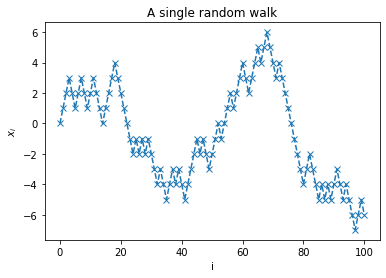

In [2]:
import numpy as np
import matplotlib.pyplot as plt


Nt = 100 #number of iterations
x = np.zeros(Nt+1)

#1 Nt-step random walk
for i in range(Nt):
    x[i+1] = x[i] + np.random.choice((-1,1))

#Display walk
plt.figure()
plt.plot(x,'x--')
plt.xlabel('i')
plt.ylabel('$x_i$')
plt.title("A single random walk")
plt.show()


Ultimately, a single random walk has little meaning, and we need to compute averages over several walks: 

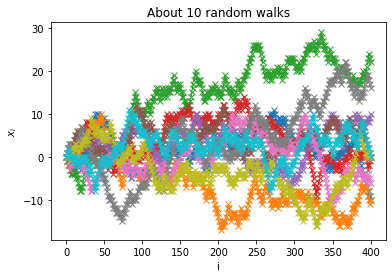

dt=1.864440


In [9]:
from time import time
import numpy as np
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    for j in range(M):
        for i in range(Nt):
            x[i+1,j] = x[i,j] + np.random.choice((-1,1))

    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

[[-1  1  1 ...  1 -1  1]
 [-1 -1 -1 ... -1 -1  1]
 [ 1  1 -1 ... -1  1  1]
 ...
 [ 1 -1  1 ... -1 -1  1]
 [ 1 -1 -1 ...  1 -1 -1]
 [-1  1  1 ... -1 -1  1]]


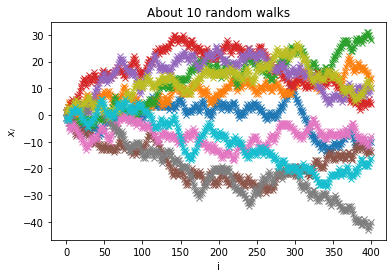

dt=0.005152


In [15]:

from time import time
import numpy as np
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    x=np.random.randint(2,size=(Nt,M))*2-1
    print(x)
    x=np.cumsum(x,axis=0)
    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk(display=True)
print("dt=%f" %out[1])

The function above is extremely inefficient for large M and Nt.
When working with arrays, it is essential to avoid loops and use built-in functions/methods whenever possible. Modify *rwalk* below so that it: 1) Pre-computes all needed random numbers and stores them in an array before computing the random walks and 2) the loop over M walks is removed and all M walks are simultaneously updated with each step of i:

[[  1  -1  -1 ...  -1   1   1]
 [  2  -2   0 ...   0   2   2]
 [  3  -3  -1 ...  -1   3   1]
 ...
 [ -4   4 -18 ... -26  20  18]
 [ -5   3 -19 ... -27  21  19]
 [ -4   4 -20 ... -26  20  18]]


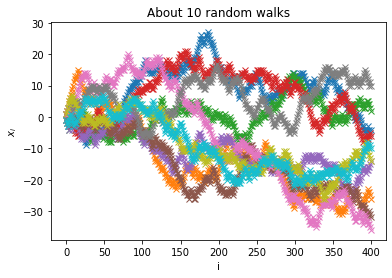

dt=0.003371


In [21]:
from time import time
def rwalk2(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    x = np.zeros((Nt+1,M))

    t1 = time()
    #M Nt-step random walks
    x=np.random.randint(2,size=(Nt,M))*2-1
    x=np.cumsum(x,axis=0)
    t2 = time()
    dt = t2-t1    
        
    if display:
        #Display walk
        plt.figure()
        plt.plot(x[:,::M//min(10,M)],'x--')
        plt.xlabel('i')
        plt.ylabel('$x_i$')
        plt.title("About %d random walks" %(min(10,M)))
        plt.show()
        
    return x,dt
out = rwalk2(display=True)
print("dt=%f" %out[1])

How much faster is your new function?

Now, compute the mean and standard deviation of $x_i$ across the M-samples. You should be able to compute this without using any loops, and you should find that the standard deviation increases as $\sqrt{i}$. What is the fraction of walkers at each position at the end of the random walks?

[[  1  -1  -1 ...  -1   1   1]
 [  2  -2   0 ...   0   2   2]
 [  3  -3  -1 ...  -1   3   1]
 ...
 [ -4   4 -18 ... -26  20  18]
 [ -5   3 -19 ... -27  21  19]
 [ -4   4 -20 ... -26  20  18]]


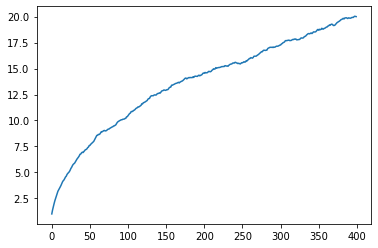

In [24]:
#Add code here
x=out[0]
print(x)
stdx=np.std(x,axis=1)
plt.plot(stdx)
    

### Task 2: Practice with arrays, eigenvalues and eigenvectors

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [25]:
import numpy as np
#Add code here
N=np.random.rand(3,3)
print(N)

[[0.04220254 0.35066065 0.65630612]
 [0.67496425 0.92312194 0.52991781]
 [0.63862447 0.1172759  0.61160577]]


2) Compute the eigenvalues and eigenvectors of N:

In [50]:
#Add code here
L,w=np.linalg.eig(N)

print(L)
print(w)

[-0.4337436   1.48198401  0.52868984]
[[ 0.84205564 -0.38295526  0.08857568]
 [-0.22795537 -0.83572126 -0.84975835]
 [-0.48885442 -0.39359274  0.51967787]]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [51]:
#Add code here
print(L)
C=N-L[0]*np.identity(3)
print(np.linalg.det(C))

[-0.4337436   1.48198401  0.52868984]
-8.343537519708274e-16


4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [52]:
#Add code here

v=w[:,0]
print(v)
print(np.dot(N,v))
print(v*L[0])


[ 0.84205564 -0.22795537 -0.48885442]
[-0.36523625  0.09887418  0.21203748]
[-0.36523625  0.09887418  0.21203748]


In [54]:
List='abcdefghijklmnopqrstuvwxyz'
t1=time()
print('z' in List)
t2=time()
print(t2-t1)

True
0.0007326602935791016


In [56]:
dict={'z':1}
List='abcdefghijklmnopqrstuvwxyz'
t1=time()
print(dict['z'])
t2=time()
print(t2-t1)

1
0.001728057861328125
